In [1]:
#import splitwavepy as sw
import obspy
from obspy import read
from obspy.clients.fdsn import Client
from obspy import UTCDateTime

import matplotlib.pyplot as plt
import numpy as np

## to do:
## events
## waveforms
## theoretical arrival times
### do splitting

In [2]:
client = Client("ETH") # ORFEUS

station= '*'
starttime = UTCDateTime("2000-01-01T00:00:00.000")
endtime = UTCDateTime("2018-12-31T00:00:00.000")

#station='DAGMA'

inventory = client.get_stations(network="CH", station=station, starttime=starttime, endtime=endtime)
print(inventory)
## Total number of available Stations
print(len(inventory[0]))

stationlist = inventory[0]


## from 0:248
station = stationlist[1]
print(station)
print(station.code)

print(station.longitude)
print(station.latitude)
print(station.elevation)
print(station.start_date)
print(station.end_date)

Inventory created at 2019-03-01T09:30:40.000000Z
	Sending institution: SeisComP3 (SED)
	Contains:
		Networks (1):
			CH
		Stations (247):
			CH.ACB (Klingnau, Acheberg, AG)
			CH.AIGLE (Bunker A365, Aigle, VD)
			CH.BALST (Balsthal, SO)
			CH.BERGE (Lenzkirch, Germany)
			CH.BERNI (Berninapass, GR)
			CH.BIBA (Brigerbad, VS)
			CH.BNALP (Bannalp, NW)
			CH.BOBI (Boebikon, Wasserreservoir Allmend, AG)
			CH.BOURR (Bourrignon, JU)
			CH.BRANT (Les Verrieres, NE)
			CH.DAGMA (Dagmersellen, Lutertal, LU)
			CH.DAVOX (Davos, Dischmatal, GR)
			CH.DIX (Grande Dixence, VS)
			CH.EMBD (Mattertal, VS)
			CH.EMING (Emmingen, Germany)
			CH.EMMET (Emmethof, AG)
			CH.EMV (Vieux-Emosson, VS)
			CH.EWZT0 (Zuerich, Triemli, ZH)
			CH.FIESA (Fiescheralp, VS)
			CH.FLACH (Flaach, ZH)
			CH.FULLY (Reservoir Mazembroz, Wallis, VS)
			CH.FUORN (Ofenpass-Fuorn, GR)
			CH.FUSIO (Fusio, TI)
			CH.GIMEL (St. Georges, Gimel, VD)
			CH.GRIMS (Grimsel, Gerstenegg, BE)
			CH.GRYON (Gryon, VD)
			CH.GUT (Gutenste

In [3]:
## 1. get events catalogue

## events after 1999
#cat = obspy.read_events("/home/hein/Dropbox/PhD/code_PhD/qcmt.ndk")
#cat2 = cat.filter("time > 2000-01-01T00:00", "magnitude >= 5.5", "depth <= 10000")
#cat2.write("/home/hein/Dropbox/PhD/code_PhD/qcmt_edit.cmt",format="CMTSOLUTION")


## Further sort out by location
#longitude = 
#latitude = 
cat = obspy.read_events("/home/hein/Dropbox/PhD/code_PhD/qcmt_edit.cmt")

cat = cat.filter("time > {0}".format(station.start_date),"time < 2018-12-01T00:00:00")
print(cat)

## show map with station and event
## event1.plot()

1025 Event(s) in Catalog:
2010-07-20T17:19:54.300000Z | -29.080,  -12.990 | 5.76 mw
2010-07-20T19:38:12.200000Z | +26.890,  +53.650 | 5.77 mw
...
2017-12-28T21:40:58.700000Z | -56.710, -142.350 | 5.54 mw
2017-12-29T21:20:56.800000Z | -53.180, -118.200 | 5.63 mw
To see all events call 'print(CatalogObject.__str__(print_all=True))'


In [4]:
event1 = cat[0]

### Event parameters
#print(event1)
orig  = event1.origins

event_info = orig[0]
mag = event1.magnitudes[0]
print(mag.mag)
print(event_info.depth)
print(event_info.time)
print(event_info.longitude)
print(event_info.latitude)


5.76
12000.0
2010-07-20T17:19:54.300000Z
-12.99
-29.08


In [8]:
from obspy.taup import TauPyModel
from obspy.geodetics.base import gps2dist_azimuth
from obspy.geodetics import locations2degrees
from obspy.taup import plot_travel_times

## compute distance 
geodetics = gps2dist_azimuth(event_info.latitude, event_info.longitude,
                           station.latitude, station.longitude, a=6378137.0, f=0.0033528106647474805)

dist_deg = locations2degrees(event_info.latitude, event_info.longitude,
                           station.latitude, station.longitude)

gc_dist = geodetics[0]
azimut = geodetics[1]
back_azimut = geodetics[2]
print(azimut)    
print(dist_deg)

## 2. compute arrival times - taup
## aku
mod = 'ak135' #
#mod = 'iasp91'
model = TauPyModel(model=mod)
arrivals = model.get_travel_times(source_depth_in_km=event_info.depth/1000, distance_in_degree=dist_deg)
#print(arrivals)

14.6711778418
77.7080072552


14.6711778418
77.7080072552
1335.21756753


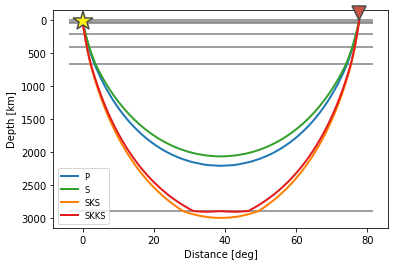

There was 1 epicentral distance without an arrival


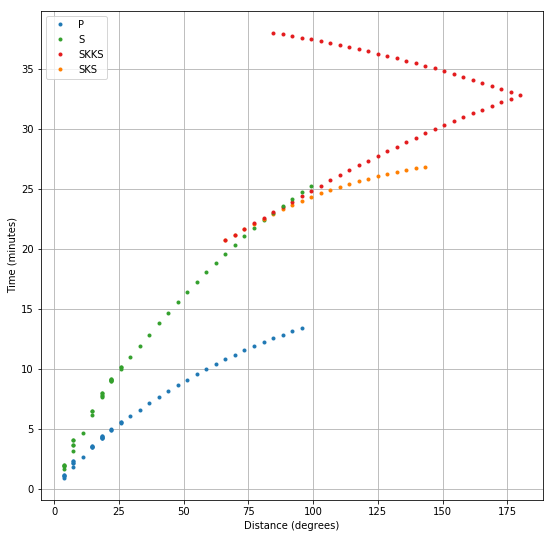

In [9]:
from obspy.taup import TauPyModel
from obspy.geodetics.base import gps2dist_azimuth
from obspy.geodetics import locations2degrees
from obspy.taup import plot_travel_times

## compute distance 
geodetics = gps2dist_azimuth(event_info.latitude, event_info.longitude,
                           station.latitude, station.longitude, a=6378137.0, f=0.0033528106647474805)

dist_deg = locations2degrees(event_info.latitude, event_info.longitude,
                           station.latitude, station.longitude)

gc_dist = geodetics[0]
azimut = geodetics[1]
back_azimut = geodetics[2]
print(azimut)    
print(dist_deg)

## 2. compute arrival times - taup
## aku
mod = 'ak135' #
#mod = 'iasp91'
model = TauPyModel(model=mod)
arrivals = model.get_travel_times(source_depth_in_km=event_info.depth/1000, distance_in_degree=dist_deg)
#print(arrivals)

t_SKS=arrivals[14].time
t_SKKS=arrivals[15].time
print(t_SKS)


PHASE_List =["P", "S", "SKS", "SKKS"]

#### continue
model = TauPyModel(model=mod)
arrivals = model.get_ray_paths(event_info.depth/1000, dist_deg, phase_list=PHASE_List)
#arrivals.plot_rays(plot_type='spherical', phase_list=PHASE_List,
#                   legend=True)

arrivals.plot_rays(plot_type='cartesian', phase_list=PHASE_List,
                   legend=True)



fig, ax = plt.subplots(figsize=(9, 9))

ax = plot_travel_times(source_depth=event_info.depth/1000, phase_list=PHASE_List,
                       ax=ax, fig=fig, verbose=True)
plt.show()

In [7]:
## 3. get waveforms, process, filter, detrend, remove response

## find matching station with matching event
## N,E,Z
#station = stationlist[1]
#t = starttime


### cal function for eventtune and SKS time 

twin = 120
t= event_info.time
print(event_info.time)
print(t_SKS)
print(station)
print(t)

st = client.get_waveforms("CH", 'BERGE', "",
                      "BH?", t,t+60*60,attach_response=True)


#st = client.get_waveforms("CH", station.code,
#                          "?H?", station.start_date, station.start_date + twin,attach_response=True)
#st = client.get_waveforms("CH", station.code, "", "EH*", t - 3, t + 15)
pre_filt = (0.001, 0.005, 40.0, 60.0)
st.remove_response(pre_filt=pre_filt, plot=False)
st.filter("bandpass",freqmin=0.01,freqmax=0.5)
# detrend, demean
#st.plot()  

st_slice = st.slice(t+t_SKS-twin,t+t_SKS+twin)
tr = st[0]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
timevec = np.linspace(float(tr.stats.starttime),float(tr.stats.endtime),tr.stats.npts)

ax.plot(timevec, tr.data, "b-")
plt.vlines(float(t)+t_SKS, min(tr.data), max(tr.data), color='r', linewidth=2)
plt.xlim(float(t)+t_SKS-twin,float(t)+t_SKS+twin)


### check for maximum value in window to identify real SKS Phase
### write out windows of waveforms..
### Plot all three channels with several incidence times


2010-07-20T17:19:54.300000Z
1335.21756753
Station SVIL (Visp, VS)
	Station Code: SVIL
	Channel Count: None/None (Selected/Total)
	2010-07-20T00:00:00.000000Z - 
	Access: open 
	Latitude: 46.29, Longitude: 7.89, Elevation: 647.0 m
	Available Channels:

2010-07-20T17:19:54.300000Z


FDSNNoDataException: No data available for request.
Detailed response of server:



2010
201
17
19
54
3000


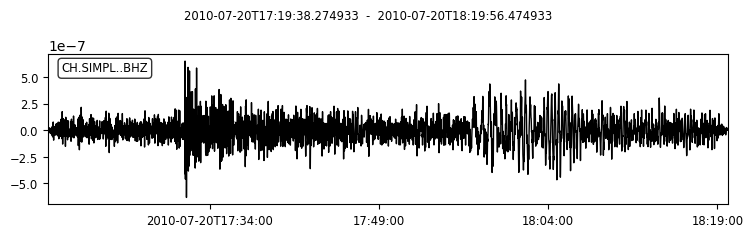

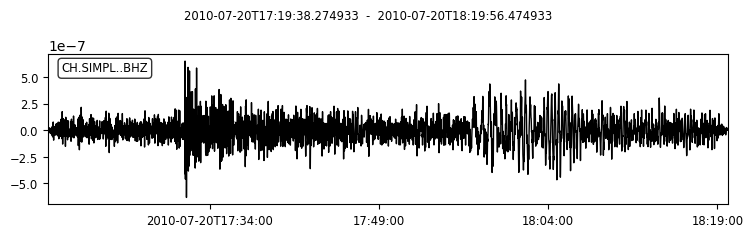

In [38]:
import os


#path = os.getcwd()  
### automatisieren, für Events und Stationen
### check for event, if station data available. save as ... 
### wave forms ausschneiden

### do splitting measurements
# st_slice.plot()
# print(len(st[0].data)/40)

# print(tr.stats.starttime)
# print(t)
# print((float(t)+t_SKS)/tr.stats.sampling_rate)

# print(st[0].stats.starttime)
print(event_info.time.year)
print(event_info.time.julday)
print(event_info.time.hour)
print(event_info.time.minute)
print(event_info.time.second)
print(event_info.time.microsecond/100)

# st = client.get_waveforms("CH", 'LIENZ', "",
#                           "BH?", event_info.time,event_info.time+60*60 ,attach_response=True)    


# tr = st[0]
# print(tr.stats.sampling_rate)
# print(tr.stats.delta)
# print(int(tr.stats.sampling_rate/10))

# tr.decimate(factor=int(tr.stats.sampling_rate/10), strict_length=False)

# print(tr.stats.sampling_rate)

tr.plot()


In [39]:
## skript to automatize waveform cutting

#print(event1.tim)
#st = client.get_waveforms("CH", 'BERGE', "",
#                          "BH?", UTCDateTime(2016,2,27),UTCDateTime(2016,2,27)+60*60 ,attach_response=True)


#stationlist_test=stationlist[0:10]


save_loc = '/media/hein/home2/SplitWave_Data'
FMT = 'SAC'
for station in stationlist:
    st = obspy.Stream()
    try:

        st = client.get_waveforms("CH", station.code, "",
                          "BH?", event_info.time,event_info.time+60*60 ,attach_response=True)       
        ## go to folder, save each trace individually        
        path= '{0}/{1}'.format(save_loc,station.code)
        
        try:  
            os.mkdir(path)
        except OSError:  
            print ("Creation of the directory %s failed" % path)
        else:  
            print ("Successfully created the directory %s " % path)
        
        pre_filt = (0.001, 0.005, 40.0, 60.0)        
        st.remove_response(pre_filt=pre_filt, plot=False)
        st.decimate(factor=int(st[0].stats.sampling_rate/10), strict_length=False)
        st.filter("bandpass",freqmin=0.01,freqmax=0.5)
        ## downsample to 10 Hz?
        
        # 2011.164.14.31.26.1450.FR.ASEAF.BHN..SAC

        
        for tr in st:
            print(tr.stats.channel)

            filename='{0}/{1}/{2}.{3}.{4}.{5}.{6}.{7}.{8}.{9}.{10}..SAC'.format(save_loc,station.code,event_info.time.year,
                                                              event_info.time.julday,event_info.time.hour,
                                                              event_info.time.minute,event_info.time.second,
                                                              event_info.time.microsecond/100,tr.stats.network,
                                                              tr.stats.station,tr.stats.channel)        
            print(filename)
           # tr.write(filename,format=FMT)
            print('saved data for Station: ',station.code)        
    except:        
        print('no data for Station: ',station.code)
        pass
    
print(st)
print(filename)

('no data for Station: ', u'STIEG')
('no data for Station: ', u'SVIL')
('no data for Station: ', u'SRHB')
('no data for Station: ', u'BERGE')
('no data for Station: ', u'SBAW')
('no data for Station: ', u'EMMET')
('no data for Station: ', u'GRYON')
Creation of the directory /media/hein/home2/SplitWave_Data/HASLI failed
BHE
/media/hein/home2/SplitWave_Data/HASLI/2010.201.17.19.54.3000.CH.HASLI.BHE..SAC
('saved data for Station: ', u'HASLI')
BHN
/media/hein/home2/SplitWave_Data/HASLI/2010.201.17.19.54.3000.CH.HASLI.BHN..SAC
('saved data for Station: ', u'HASLI')
BHZ
/media/hein/home2/SplitWave_Data/HASLI/2010.201.17.19.54.3000.CH.HASLI.BHZ..SAC
('saved data for Station: ', u'HASLI')
('no data for Station: ', u'SVIO')
Creation of the directory /media/hein/home2/SplitWave_Data/SIMPL failed
BHE
/media/hein/home2/SplitWave_Data/SIMPL/2010.201.17.19.54.3000.CH.SIMPL.BHE..SAC
('saved data for Station: ', u'SIMPL')
BHN
/media/hein/home2/SplitWave_Data/SIMPL/2010.201.17.19.54.3000.CH.SIMPL.BHN..

('no data for Station: ', u'EMING')
('no data for Station: ', u'SARK')
('no data for Station: ', u'BIBA')
Successfully created the directory /media/hein/home2/SplitWave_Data/DAVOX 
BHE
/media/hein/home2/SplitWave_Data/DAVOX/2010.201.17.19.54.3000.CH.DAVOX.BHE..SAC
('saved data for Station: ', u'DAVOX')
BHN
/media/hein/home2/SplitWave_Data/DAVOX/2010.201.17.19.54.3000.CH.DAVOX.BHN..SAC
('saved data for Station: ', u'DAVOX')
BHZ
/media/hein/home2/SplitWave_Data/DAVOX/2010.201.17.19.54.3000.CH.DAVOX.BHZ..SAC
('saved data for Station: ', u'DAVOX')
Successfully created the directory /media/hein/home2/SplitWave_Data/MUGIO 
BHE
/media/hein/home2/SplitWave_Data/MUGIO/2010.201.17.19.54.3000.CH.MUGIO.BHE..SAC
('saved data for Station: ', u'MUGIO')
BHN
/media/hein/home2/SplitWave_Data/MUGIO/2010.201.17.19.54.3000.CH.MUGIO.BHN..SAC
('saved data for Station: ', u'MUGIO')
BHZ
/media/hein/home2/SplitWave_Data/MUGIO/2010.201.17.19.54.3000.CH.MUGIO.BHZ..SAC
('saved data for Station: ', u'MUGIO')
('no d

BHN
/media/hein/home2/SplitWave_Data/FIESA/2010.201.17.19.54.3000.CH.FIESA.BHN..SAC
('saved data for Station: ', u'FIESA')
BHZ
/media/hein/home2/SplitWave_Data/FIESA/2010.201.17.19.54.3000.CH.FIESA.BHZ..SAC
('saved data for Station: ', u'FIESA')
BHE
/media/hein/home2/SplitWave_Data/FIESA/2010.201.17.19.54.3000.CH.FIESA.BHE..SAC
('saved data for Station: ', u'FIESA')
('no data for Station: ', u'SLCF')
('no data for Station: ', u'JAUN')
Successfully created the directory /media/hein/home2/SplitWave_Data/FUORN 
BHE
/media/hein/home2/SplitWave_Data/FUORN/2010.201.17.19.54.3000.CH.FUORN.BHE..SAC
('saved data for Station: ', u'FUORN')
BHN
/media/hein/home2/SplitWave_Data/FUORN/2010.201.17.19.54.3000.CH.FUORN.BHN..SAC
('saved data for Station: ', u'FUORN')
BHZ
/media/hein/home2/SplitWave_Data/FUORN/2010.201.17.19.54.3000.CH.FUORN.BHZ..SAC
('saved data for Station: ', u'FUORN')
('no data for Station: ', u'SFRS')
('no data for Station: ', u'SENGL')
('no data for Station: ', u'SBUL')
('no data f